<a href="https://colab.research.google.com/github/Sanket-Nimbalkar/Health-Insurance-Cross-Sell-Prediction/blob/main/Health_Insurance_Cross_Sell_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Health Insurance Cross Sell Prediction

> Add blockquote





##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

**Data Preprocessing** :

1. Getting the dataset
2. Importing libraries
3. Importing datasets
4. Finding Missing Data
5. Encoding Categorical Data
6. Data Cleaning and Feature Engineering

**Exploratory data analysis(EDA) :**
1. Firstly checking distribution of Response.
2. Count comparision of various column.
3. Count of response with respect to various column.
5. checking correaltion of columns.

**Implementing Machine Learing Models :-**
1. Logistic Regression
2. Random Forest


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [205]:
# Import Libraries
import numpy as np
import pandas as pd

#Data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

#train test split
from sklearn.model_selection import train_test_split

#Handeling imbalance dataset
from imblearn.combine import SMOTETomek

# scaling data
from sklearn.preprocessing import StandardScaler

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Performance metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


### Dataset Loading

In [206]:
# Load Datasetort
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [207]:
file_path = '/content/drive/MyDrive/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION (2).csv'

In [208]:
dataset = pd.read_csv(file_path)

### Dataset First View

In [209]:
# Dataset First Look
dataset.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [210]:
# Dataset Rows & Columns count
dataset.shape

(381109, 12)

### Dataset Information

In [211]:
# Dataset Info
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [212]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()

0

#### Missing Values/Null Values

In [213]:
# Missing Values/Null Values Count
dataset.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

<Axes: >

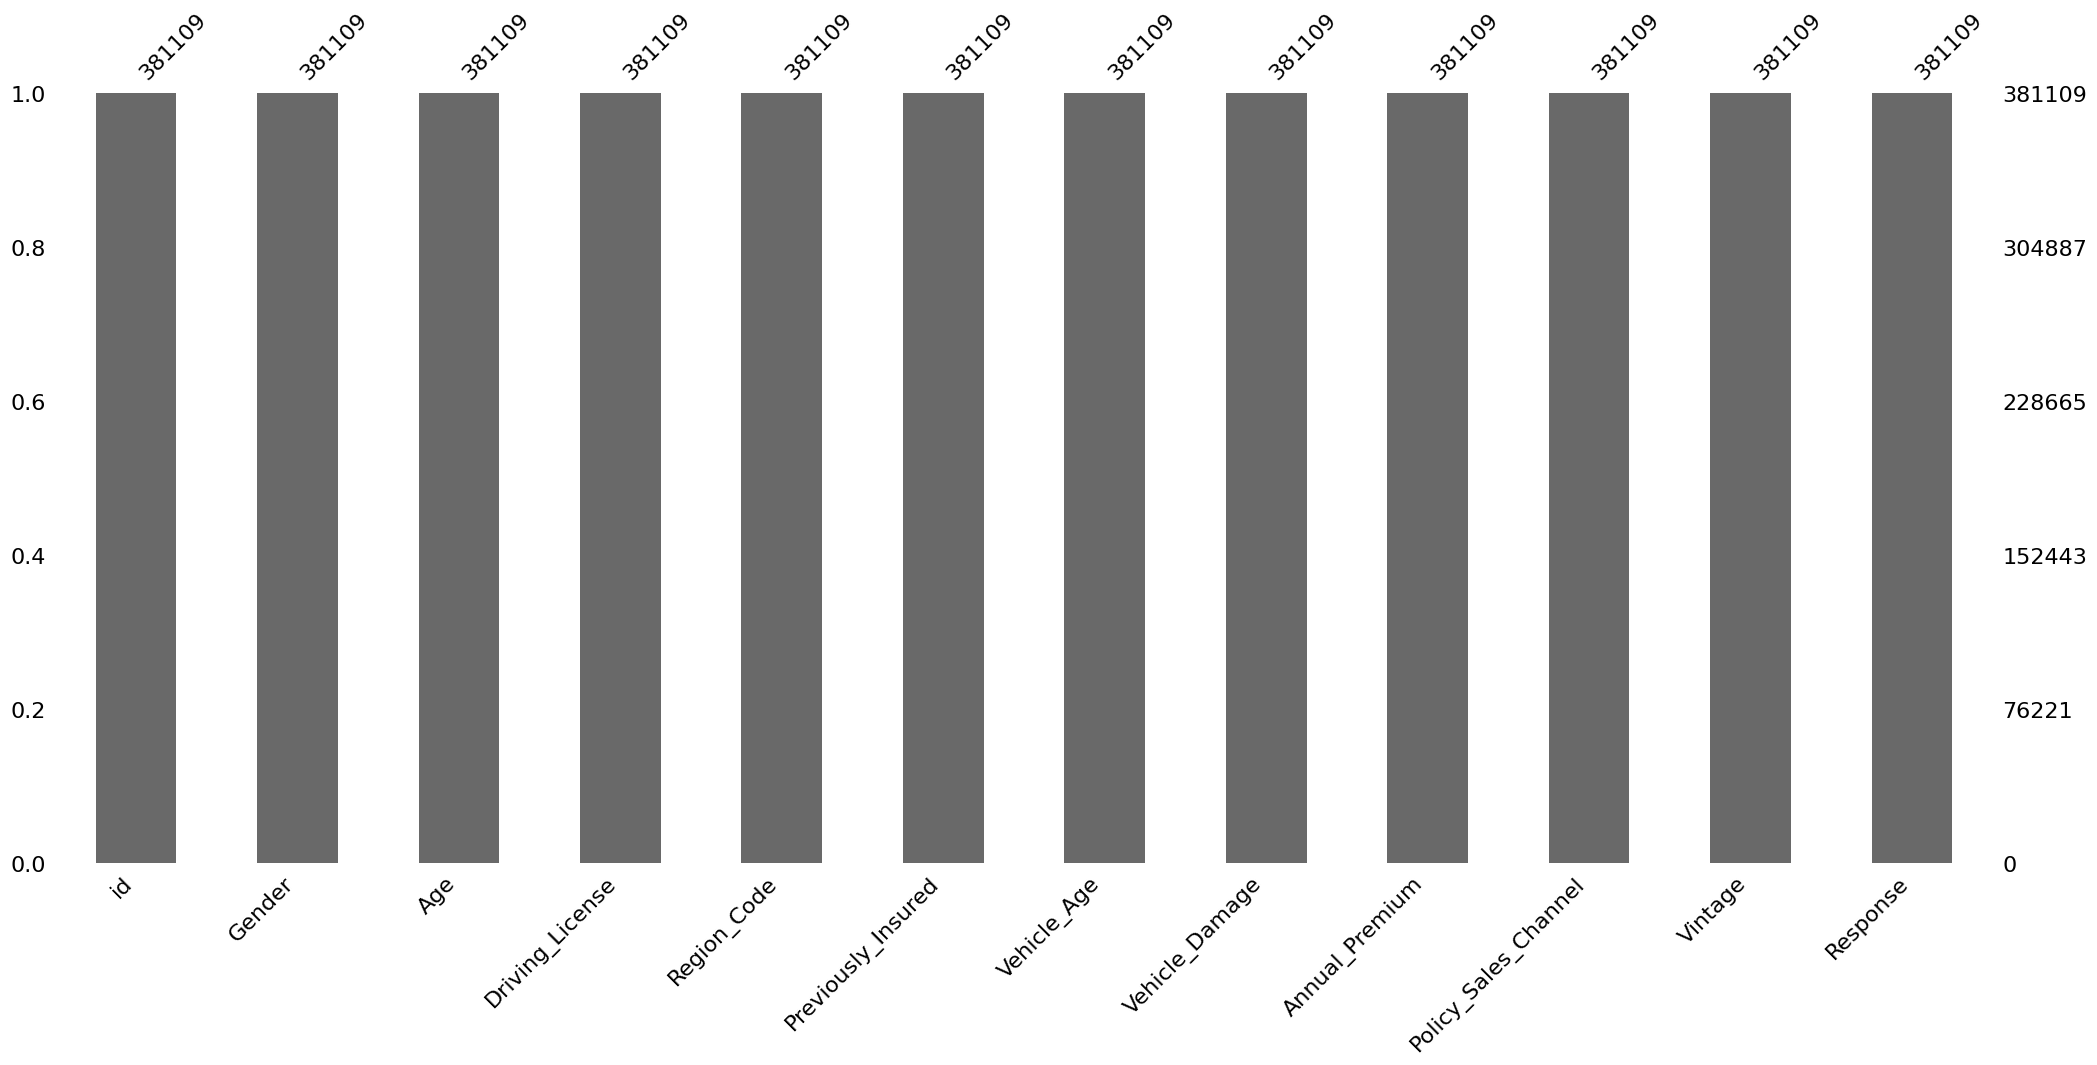

In [214]:
# Visualizing the missing values
msno.bar(dataset)

### What did you know about your dataset?


*   We have 381109 rows and 12 columns in our dataset.
*   Dataset have zero duplicate values.
*   Dataset have zero null values






## ***2. Understanding Your Variables***

In [215]:
# Dataset Columns
dataset.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [216]:
# Dataset Describe
dataset.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description

1. id : Unique ID for the customer

2. Gender : Gender of the customer

3. Age : Age of the customer

4. Driving_License 0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code : Unique code for the region of the customer

6. Previously_Insured : 1 : Customer already has Vehicle Insurance, 0 :  
   Customer doesn't have Vehicle Insurance

7. Vehicle_Age : Age of the Vehicle

8. Vehicle_Damage :1 : Customer got his/her vehicle damaged in the past. 0 :
   Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium : The amount customer needs to pay as premium in the year

10. PolicySalesChannel : Anonymized Code for the channel of outreaching to the
     customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage : Number of Days, Customer has been associated with the company

12. Response : 1 : Customer is interested, 0 : Customer is not interested

### Check Unique Values for each variable.

In [217]:
# Check Unique Values for each variable.
for col in dataset.columns:
  print('Number of unique values in {} column are {}. \n The unique values are {}'.format(col, dataset[col].nunique(), dataset[col].unique()))
  print('-----------------------------------------------------------------------')

Number of unique values in id column are 381109. 
 The unique values are [     1      2      3 ... 381107 381108 381109]
-----------------------------------------------------------------------
Number of unique values in Gender column are 2. 
 The unique values are ['Male' 'Female']
-----------------------------------------------------------------------
Number of unique values in Age column are 66. 
 The unique values are [44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]
-----------------------------------------------------------------------
Number of unique values in Driving_License column are 2. 
 The unique values are [1 0]
-----------------------------------------------------------------------
Number of unique values in Region_Code column are 53. 
 The unique values are [28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [218]:
# Write your code to make your dataset analysis ready.
df= dataset.copy()
yo = len(df[df['Response']==1])
no = len(df[df['Response']==0])
print('The number of customer Responded Yes:', yo)
print('The number of customer Responded No:', no)

The number of customer Responded Yes: 46710
The number of customer Responded No: 334399


In [219]:
# Gender wise response
gender_response = df.groupby('Gender')['Response'].value_counts().reset_index(name='Count')
gender_response


,Gender,Response,Count
0,Female,0,156835
1,Female,1,18185
2,Male,0,177564
3,Male,1,28525


In [220]:
#Vehicle age wise count
vehicle_age = df.groupby('Vehicle_Age')['id'].count().reset_index(name='Count')
vehicle_age

,Vehicle_Age,Count
0,1-2 Year,200316
1,< 1 Year,164786
2,> 2 Years,16007


In [221]:
#Vehicle damage count
vehicle_damage = df.groupby('Vehicle_Damage')['id'].count().reset_index(name='Count')
vehicle_damage

,Vehicle_Damage,Count
0,No,188696
1,Yes,192413


In [222]:
#vehicle age wise average premium
avg_premium = df.groupby('Vehicle_Age')['Annual_Premium'].mean().reset_index()
avg_premium

,Vehicle_Age,Annual_Premium
0,1-2 Year,30523.582120
1,< 1 Year,30119.552025
2,> 2 Years,35654.499469


In [223]:
#Previously Insured customers response
previously_insured = df.groupby('Previously_Insured')['Response'].value_counts().reset_index(name='Count')
previously_insured

,Previously_Insured,Response,Count
0,0,0,159929
1,0,1,46552
2,1,0,174470
3,1,1,158


### What all manipulations have you done and insights you found?

* We have created Response count with different columns.

* Only 46710 responded yes.

* Average premium for vehicle above 2 years age is higher.Answer Here.





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: ylabel='count'>

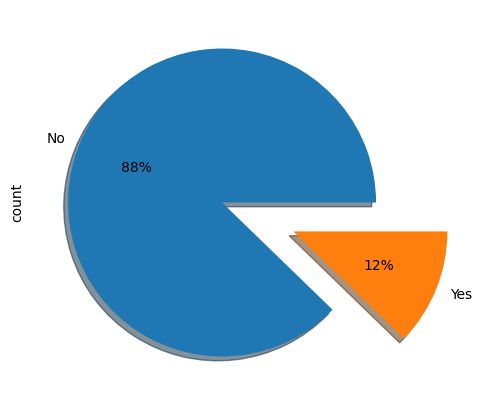

In [224]:
# Chart - 1 visualization code
plt.figure(figsize=(10,5))
df['Response'].value_counts().plot.pie(autopct= '%1.f%%', explode=[0,0.5], shadow=True, labels=['No','Yes'] )

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

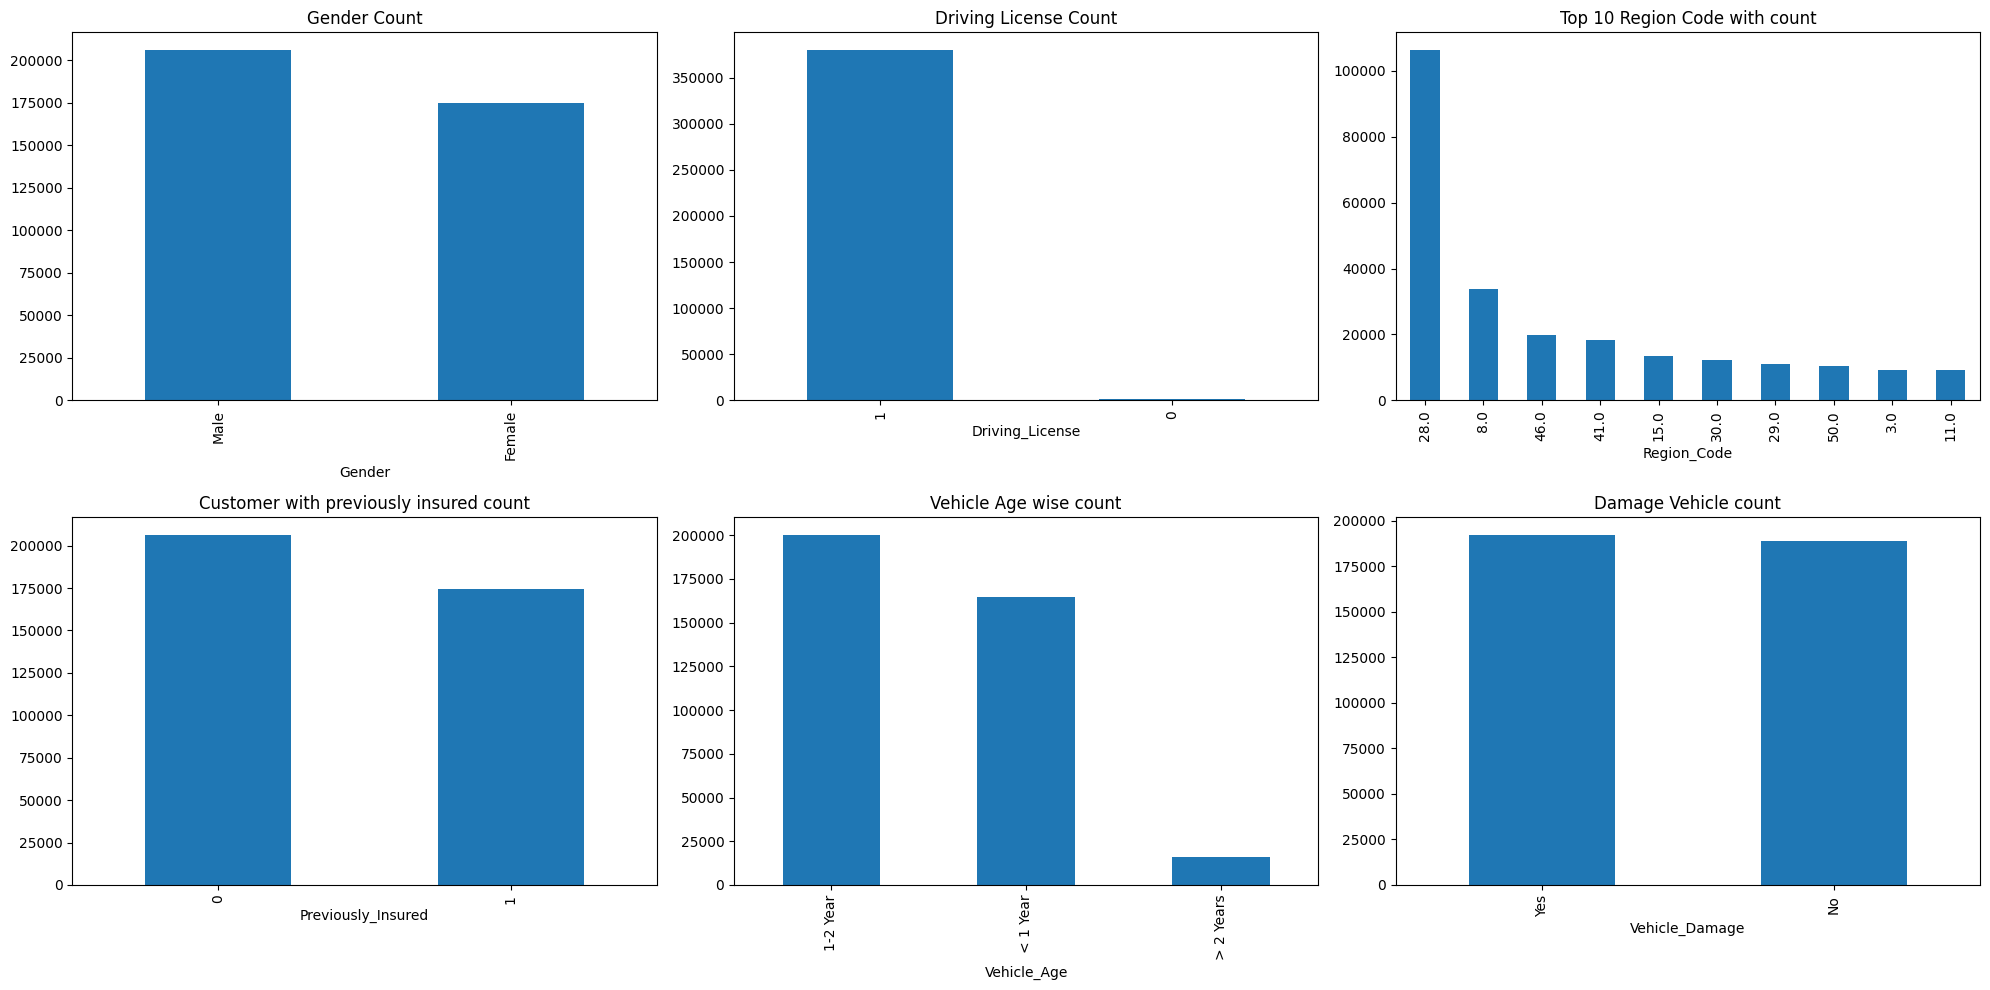

In [225]:
# Chart - 2 visualization code
f, ax = plt.subplots(2, 3, figsize = (20,10))
df['Gender'].value_counts().plot(kind='bar',ax= ax[0,0],title="Gender Count" )
df['Driving_License'].value_counts().plot(kind='bar', ax= ax[0,1], title='Driving License Count')
df['Region_Code'].value_counts().head(10).plot(kind='bar',ax= ax[0,2], title='Top 10 Region Code with count')
df['Previously_Insured'].value_counts().plot(kind='bar', ax= ax[1,0],title= 'Customer with previously insured count')
df['Vehicle_Age'].value_counts().plot(kind='bar', ax= ax[1,1], title = 'Vehicle Age wise count')
df['Vehicle_Damage'].value_counts().plot(kind='bar', ax= ax[1,2], title= 'Damage Vehicle count')
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

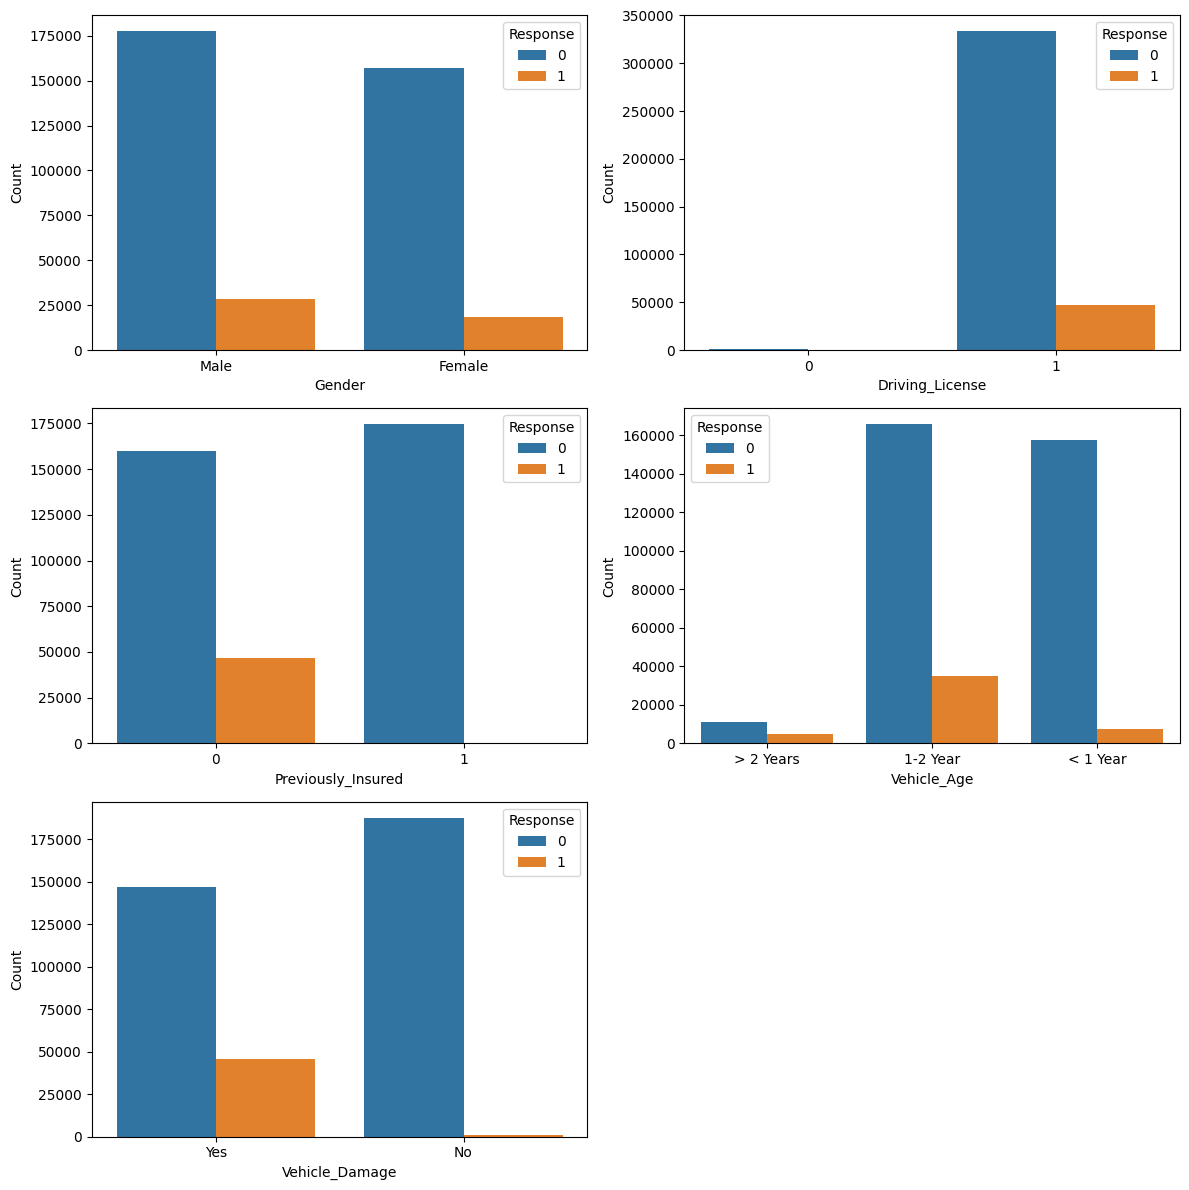

In [226]:
# Chart - 3 visualization code
col = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage' ]
plt.figure(figsize=(12,12))
n = 1
for i in col :
  ax= plt.subplot(3,2,n)
  sns.countplot(x=i, hue='Response', data=df)
  plt.xlabel(i)
  plt.ylabel('Count')
  plt.tight_layout()
  n+=1
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

Text(0.5, 1.0, 'Mean of Annual Premium with respect to Vehicle age')

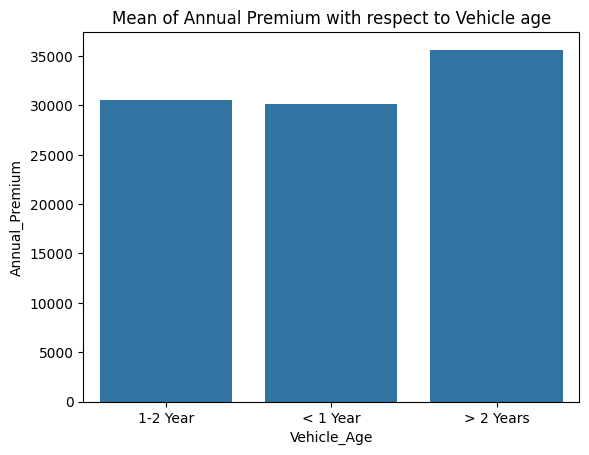

In [227]:
# Chart - 4 visualization code
df1 =df.groupby('Vehicle_Age')['Annual_Premium'].mean().reset_index()
sns.barplot(x= 'Vehicle_Age', y = 'Annual_Premium', data = df1)
plt.title('Mean of Annual Premium with respect to Vehicle age')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

Text(0.5, 1.0, 'Mean of Annual Premium with respect to Vehicle age')

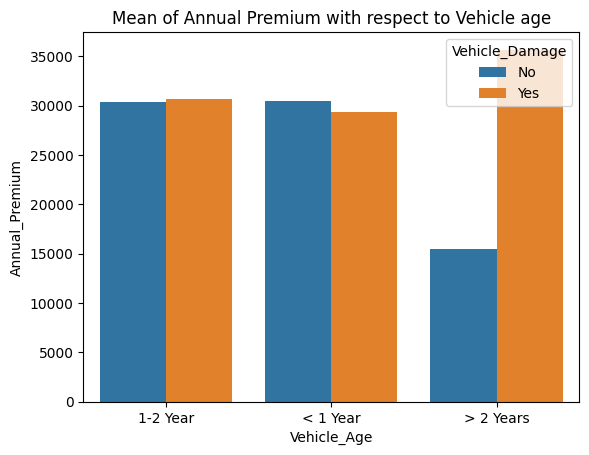

In [228]:
# Chart - 5 visualization code
df2 =df.groupby(['Vehicle_Age', 'Vehicle_Damage'])['Annual_Premium'].mean().reset_index()
sns.barplot(x= 'Vehicle_Age', y = 'Annual_Premium', hue= 'Vehicle_Damage', data = df2)
plt.title('Mean of Annual Premium with respect to Vehicle age')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

<Axes: xlabel='Response', ylabel='Age'>

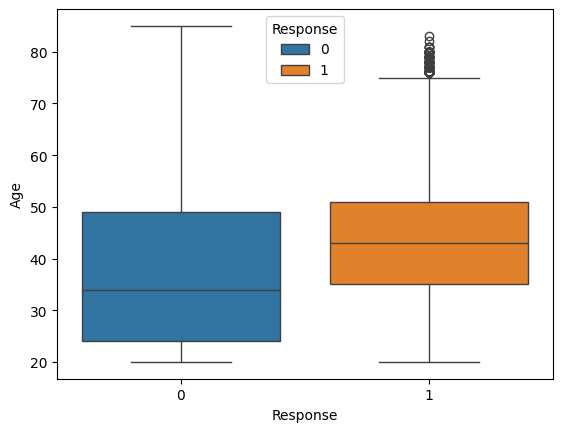

In [229]:
# Chart - 6 visualization code
sns.boxplot(y='Age', x = 'Response', data=df, hue='Response')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

<Axes: xlabel='Response', ylabel='Annual_Premium'>

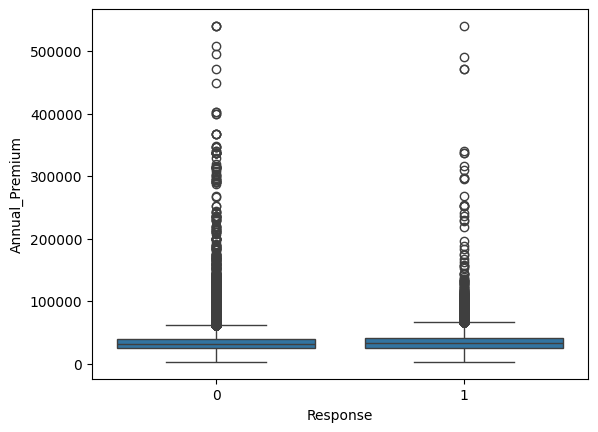

In [230]:
# Chart - 7 visualization code
sns.boxplot(y='Annual_Premium', x='Response', data=df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

<Axes: xlabel='Age', ylabel='count'>

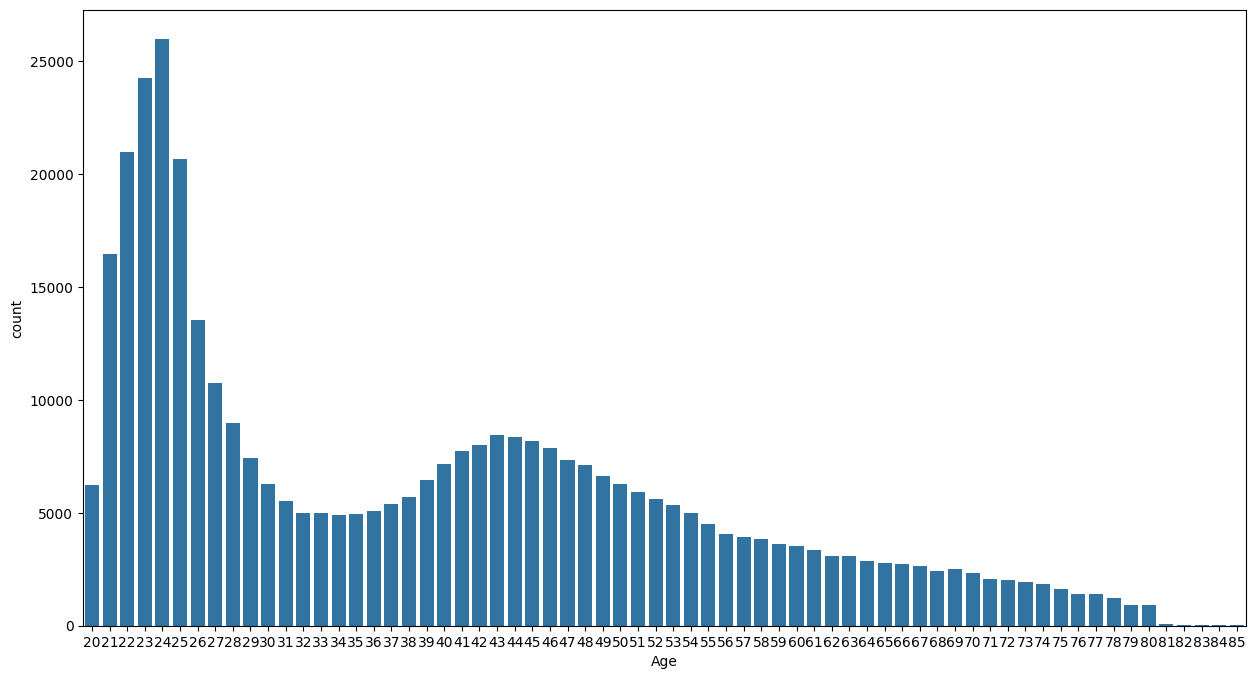

In [231]:
# Chart - 8 visualization code
#Distribution of Age
plt.figure(figsize=(15,8))
sns.countplot(x=df['Age'],data=df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

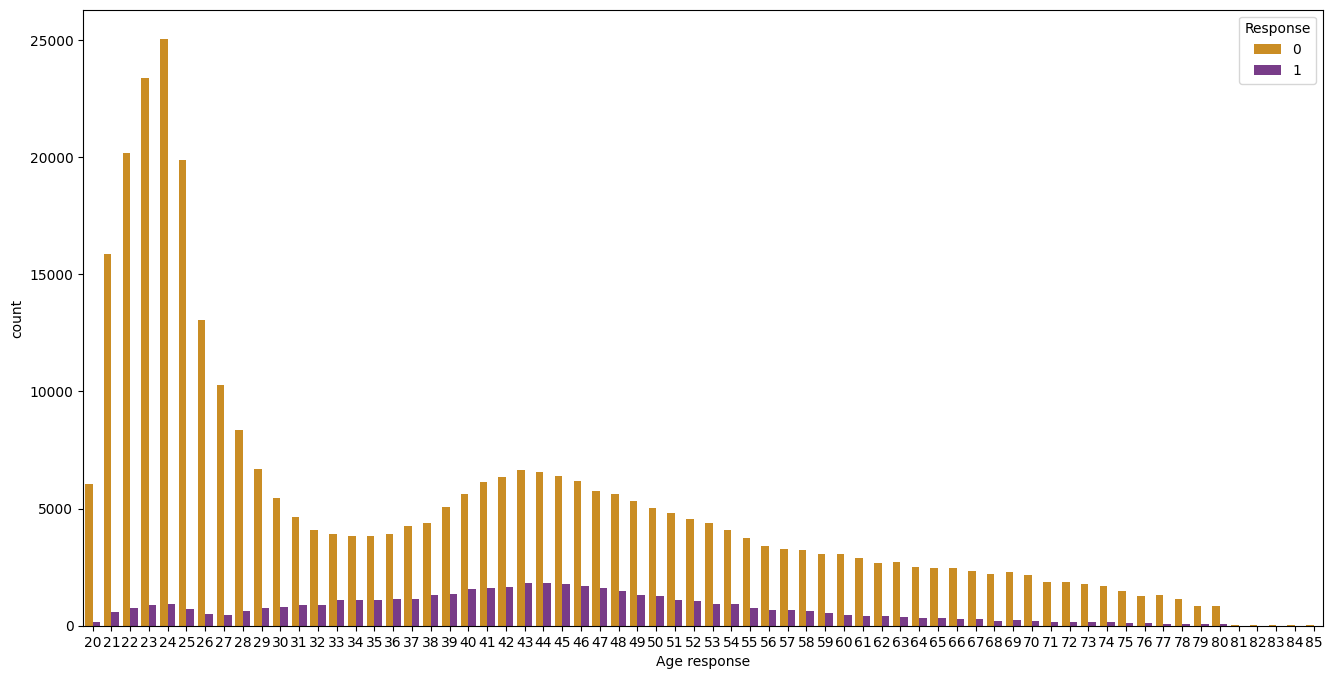

In [232]:
# Chart - 9 visualization code
#Age VS Response
plt.figure(figsize=(16,8))
sns.countplot(data=df, x='Age',hue='Response', palette='CMRmap_r')
plt.xlabel('Age response')
plt.ylabel('count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [233]:
df_num = df.select_dtypes(include=['number'])

<Axes: >

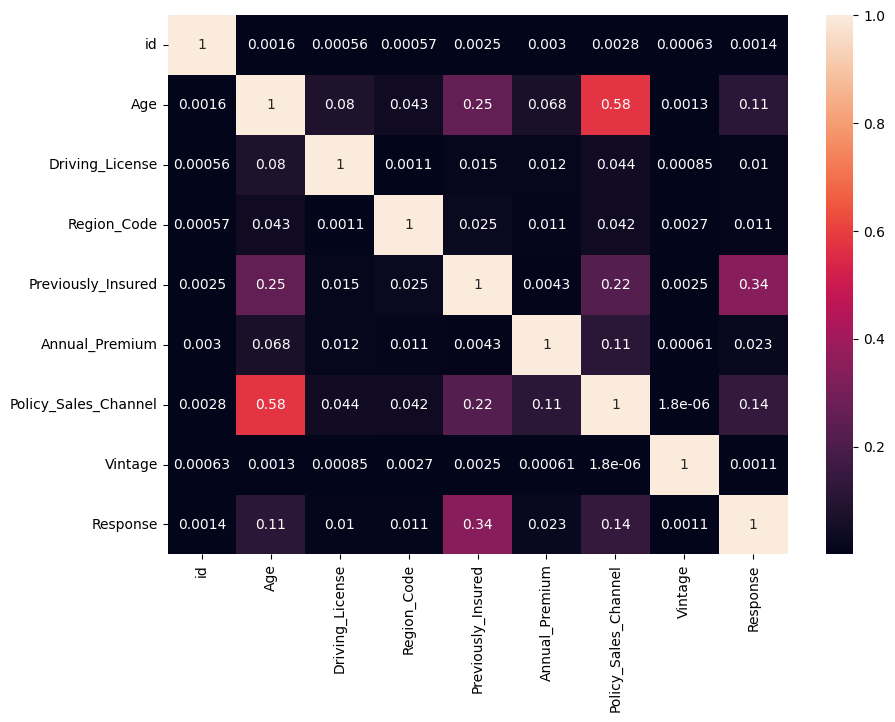

In [234]:
# Correlation Heatmap visualization code
plt.figure(figsize= (10,7))
sns.heatmap(df_num.corr().abs(), annot= True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [235]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [236]:
df.shape

(381109, 12)

In [237]:
# Handling Outliers & Outlier treatments
def outlier_remove(df_in, col):
  q1 = df[col].quantile(0.25)
  q3= df[col].quantile(0.75)
  IQR = q3-q1
  low_bridge=q1- 1.5*IQR
  high_bridge = q3+1.5*IQR
  df_out= df_in.loc[(df_in[col]> low_bridge) & (df_in[col]< high_bridge)]
  return df_out

In [238]:
main= outlier_remove(df, 'Annual_Premium')

In [239]:
main.shape

(370789, 12)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [240]:
# Encode your categorical columns
main['Vintage']= main['Vintage'].apply(lambda x : 'New' if x <= 90 else 'Older' if x<=180 else 'Oldest' if x<=270 else 'Vintage')

<ipython-input-240-95fd3d1d700a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['Vintage']= main['Vintage'].apply(lambda x : 'New' if x <= 90 else 'Older' if x<=180 else 'Oldest' if x<=270 else 'Vintage')


In [241]:
main['Vintage'] = main['Vintage'].map({'New':1, "Older":2, 'Oldest':3, 'Vintage':4})


<ipython-input-241-532a090fd4d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['Vintage'] = main['Vintage'].map({'New':1, "Older":2, 'Oldest':3, 'Vintage':4})


In [242]:
# Encode your categorical columns
main['Gender']= main['Gender'].map({'Female': 0, 'Male':1})
main['Vehicle_Damage']= main['Vehicle_Damage'].map({'Yes':1, 'No':0})

main = pd.get_dummies(main, drop_first = True)


<ipython-input-242-616169d4b9c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['Gender']= main['Gender'].map({'Female': 0, 'Male':1})
<ipython-input-242-616169d4b9c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['Vehicle_Damage']= main['Vehicle_Damage'].map({'Yes':1, 'No':0})


In [243]:
main.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Vehicle_Age_< 1 Year',
       'Vehicle_Age_> 2 Years'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [244]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [245]:
main.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,1,44,1,28.0,0,1,40454.0,26.0,3,1,False,True
1,2,1,76,1,3.0,0,0,33536.0,26.0,3,0,False,False
2,3,1,47,1,28.0,0,1,38294.0,26.0,1,1,False,True
3,4,1,21,1,11.0,1,0,28619.0,152.0,3,0,True,False
4,5,0,29,1,41.0,1,0,27496.0,152.0,1,0,True,False


In [246]:
# Select your features wisely to avoid overfitting
X = main.drop(['id',"Response"], axis=1)
y= main['Response']

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [247]:
# Transform Your data

### 6. Data Scaling

In [248]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [249]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [250]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

In [251]:
# check for imbalance in data
y.value_counts()

Response
0    325634
1     45155
Name: count, dtype: int64

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [252]:
# Handling Imbalanced Dataset (If needed)
from collections import Counter
os=SMOTETomek(random_state=42)
X_,y_=os.fit_resample(X,y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_)))

The number of classes before fit Counter({0: 325634, 1: 45155})
The number of classes after fit Counter({1: 315892, 0: 315892})


In [253]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train,X_test,y_train,y_test=train_test_split(X_,y_,test_size=0.2,random_state=7)


In [254]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((505427, 11), (126357, 11), (505427,), (126357,))

In [255]:
# Scaling your data
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***6. ML Model Implementation***

### ML Model - 1

In [256]:
# ML Model - 1 Implementation
logs= LogisticRegression(fit_intercept=True, max_iter=10000)


# Fit the Algorithm
logs.fit(X_train,y_train)

# Predict on the model
train_pred = logs.predict(X_train)
test_pred = logs.predict(X_test)


train_accuracy1= accuracy_score(train_pred, y_train)
test_accuracy1= accuracy_score(test_pred, y_test)

print('\n')
print("The accuracy on train data is ", train_accuracy1)
print("The accuracy on test data is ", test_accuracy1)
print('\n')

 # calculating precision, recall, f1 score on the test set
precision1 = precision_score(y_test, test_pred, average='weighted')
print("The precision on test dataset is", precision1)

recall1 = recall_score(y_test, test_pred, average='weighted')
print("The recall on test dataset is", recall1)

f1_1 = f1_score(y_test, test_pred, average='weighted')
print("The f1 score on test dataset is", f1_1)




The accuracy on train data is  0.7877299788099963
The accuracy on test data is  0.7873010596959409


The precision on test dataset is 0.8130689840733287
The recall on test dataset is 0.7873010596959409
The f1 score on test dataset is 0.7827960391827224


In [257]:
cr1 = classification_report(y_train,train_pred)
cr2 =classification_report(y_test, test_pred)
print('For train\n' , cr1)

print('----------------------------------------------------------------------------')
print('For test\n' , cr2)

For train
               precision    recall  f1-score   support

           0       0.90      0.64      0.75    252770
           1       0.72      0.93      0.81    252657

    accuracy                           0.79    505427
   macro avg       0.81      0.79      0.78    505427
weighted avg       0.81      0.79      0.78    505427

----------------------------------------------------------------------------
For test
               precision    recall  f1-score   support

           0       0.90      0.64      0.75     63122
           1       0.72      0.93      0.81     63235

    accuracy                           0.79    126357
   macro avg       0.81      0.79      0.78    126357
weighted avg       0.81      0.79      0.78    126357



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [258]:
cm1= confusion_matrix( y_train, train_pred)
cm2= confusion_matrix( y_test, test_pred)
print('For train\n' ,
      cm1)
print('\n')
print('For Test\n' , cm2)

For train
 [[162917  89853]
 [ 17434 235223]]


For Test
 [[40614 22508]
 [ 4368 58867]]


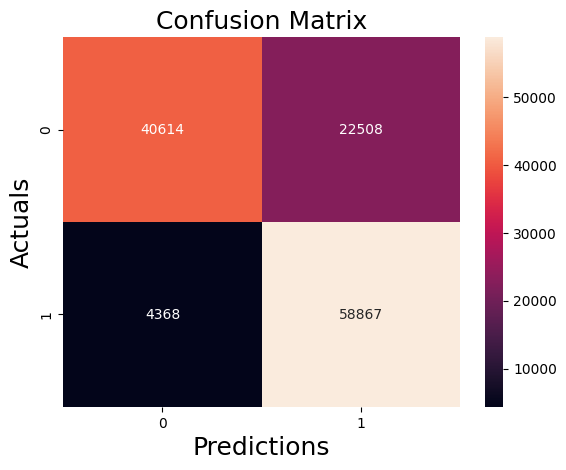

In [259]:

# Visualizing evaluation Metric Score chart

sns.heatmap(cm2, annot=True, fmt='g' )
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [192]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

logsr = LogisticRegression(max_iter=10000)
param1 = {'C': [1, 0.5, 0.1, 5, 7, 9, 12],'penalty':['l2','l1', 'elasticnet']}

grid_search = GridSearchCV(estimator=logsr, param_grid= param1, cv=5, scoring='f1')

# Fit the Algorithm
grid_result=grid_search.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 105.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

In [193]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


# Predict on the model
# Get the predicted classes
train_pred2 = grid_result.predict(X_train)
test_pred2 = grid_result.predict(X_test)


train_accuracy2= accuracy_score(train_pred2, y_train)
test_accuracy2= accuracy_score(test_pred2, y_test)

print('\n')
print("The accuracy on train data is ", train_accuracy2)
print("The accuracy on test data is ", test_accuracy2)
print('\n')

 # calculating precision and recall on the test set
precision2 = precision_score(y_test, test_pred2, average='weighted')
print("The precision on test dataset is", precision2)

recall2 = recall_score(y_test, test_pred2, average='weighted')
print("The recall on test dataset is", recall2)

f1_2 = f1_score(y_test, test_pred2, average='weighted')
print("The f1 score on test dataset is", f1_2)


Best: 0.814246 using {'C': 0.1, 'penalty': 'l2'}


The accuracy on train data is  0.787706236508932
The accuracy on test data is  0.7873089737806374


The precision on test dataset is 0.8130807125100541
The recall on test dataset is 0.7873089737806374
The f1 score on test dataset is 0.7828036152162725


In [194]:
cr3 = classification_report(y_train,train_pred2)
cr4 =classification_report(y_test,test_pred2)
print('For train\n' , cr3)

print('----------------------------------------------------------------------------')
print('For test\n' , cr4)


For train
               precision    recall  f1-score   support

           0       0.90      0.64      0.75    252770
           1       0.72      0.93      0.81    252657

    accuracy                           0.79    505427
   macro avg       0.81      0.79      0.78    505427
weighted avg       0.81      0.79      0.78    505427

----------------------------------------------------------------------------
For test
               precision    recall  f1-score   support

           0       0.90      0.64      0.75     63122
           1       0.72      0.93      0.81     63235

    accuracy                           0.79    126357
   macro avg       0.81      0.79      0.78    126357
weighted avg       0.81      0.79      0.78    126357



In [195]:
cm3= confusion_matrix( y_train, train_pred2)
cm4= confusion_matrix( y_test, test_pred2)
print('For train\n' ,
      cm3)
print('\n')
print('For Test\n' , cm4)

For train
 [[162917  89853]
 [ 17446 235211]]


For Test
 [[40614 22508]
 [ 4367 58868]]


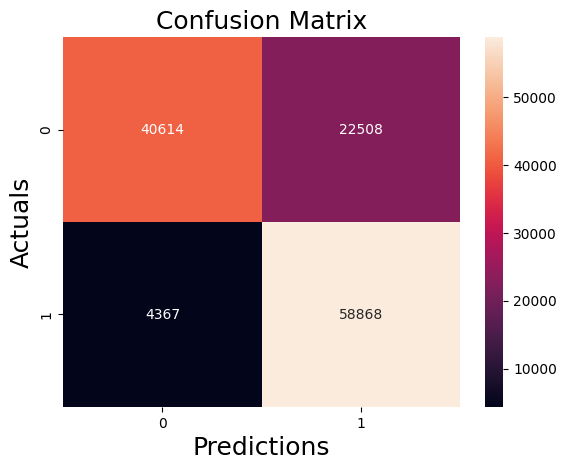

In [196]:
# Visualizing evaluation Metric Score chart

sns.heatmap(cm4, annot=True, fmt='g' )
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [197]:

# Define the Random Forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

# Fit the Algorithm
rf.fit(X_train, y_train)

# Predict on the model
train_pred3 = rf.predict(X_train)
test_pred3 = rf.predict(X_test)

train_accuracy3 = accuracy_score(train_pred, y_train)
test_accuracy3 = accuracy_score(test_pred, y_test)

print('\n')
print("The accuracy on train data is ", train_accuracy3)
print("The accuracy on test data is ", test_accuracy3)
print('\n')

# Calculating precision, recall, f1 score on the test set
precision3 = precision_score(y_test, test_pred, average='weighted')
print("The precision on test dataset is", precision3)

recall3 = recall_score(y_test, test_pred, average='weighted')
print("The recall on test dataset is", recall3)

f1_3 = f1_score(y_test, test_pred, average='weighted')
print("The f1 score on test dataset is", f1_3)




The accuracy on train data is  0.7877299788099963
The accuracy on test data is  0.7873010596959409


The precision on test dataset is 0.8130689840733287
The recall on test dataset is 0.7873010596959409
The f1 score on test dataset is 0.7827960391827224


In [198]:
cr5 = classification_report(y_train,train_pred3)
cr6 =classification_report(y_test,test_pred3)
print('For train\n' , cr5)

print('----------------------------------------------------------------------------')
print('For test\n' , cr6)


For train
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    252770
           1       0.99      1.00      0.99    252657

    accuracy                           0.99    505427
   macro avg       0.99      0.99      0.99    505427
weighted avg       0.99      0.99      0.99    505427

----------------------------------------------------------------------------
For test
               precision    recall  f1-score   support

           0       0.90      0.85      0.87     63122
           1       0.86      0.90      0.88     63235

    accuracy                           0.88    126357
   macro avg       0.88      0.88      0.88    126357
weighted avg       0.88      0.88      0.88    126357



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [199]:
cm5= confusion_matrix( y_train, train_pred3)
cm6= confusion_matrix( y_test, test_pred3)
print('For train\n' ,
      cm5)
print('\n')
print('For Test\n' , cm6)

For train
 [[249908   2862]
 [   802 251855]]


For Test
 [[53615  9507]
 [ 6263 56972]]


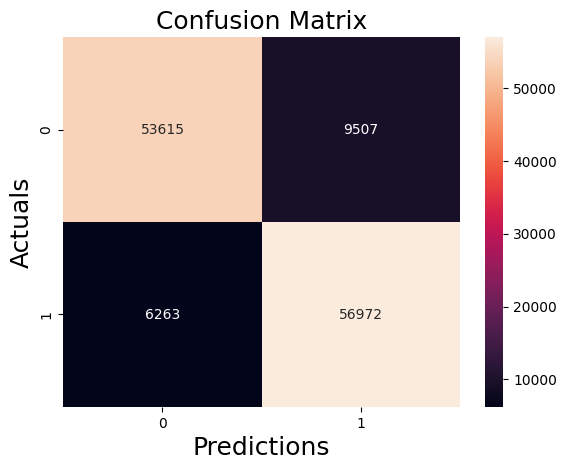

In [200]:
# Visualizing evaluation Metric Score chart
sns.heatmap(cm6, annot=True, fmt='g' )
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [201]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Accuracy

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [202]:
models = pd.DataFrame({'models' :["Logestic regression", 'LR With Hyperparmeters ', 'Random Forest' ],
                       'Accuracy': [test_accuracy1,test_accuracy2,test_accuracy3,],
                       "Precision":[precision1,precision2,precision3,],
                       'Recall' : [recall1, recall2, recall3],
                       'F1_score': [f1_1, f1_2,f1_3,]},
                      )
models.sort_values(by=['Accuracy'], ascending=False, inplace=True)
models

,models,Accuracy,Precision,Recall,F1_score
1,LR With Hyperparmeters,0.787309,0.813081,0.787309,0.782804
0,Logestic regression,0.787301,0.813069,0.787301,0.782796
2,Random Forest,0.787301,0.813069,0.787301,0.782796


## ***7.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [203]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [204]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***